## **Point Processing in Image Processing**

### Libraries

In [ ]:
from skimage.color import rgb2lab, lab2rgb
from matplotlib import pyplot as plt
import numpy as np

### Load image

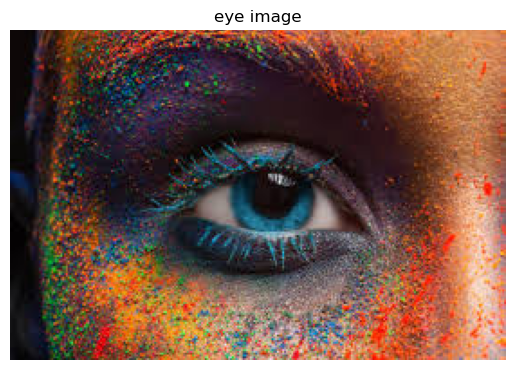

In [22]:
image = plt.imread('images/image.jpeg')
plt.imshow(image)
plt.title('eye image')
plt.axis('off')
plt.show()

### NumPy for images

In [6]:
print(type(image))

<class 'numpy.ndarray'>


In [7]:
print(image.shape)

(183, 275, 3)


In [8]:
print(image.ndim)

3


In [9]:
print(image.size)

150975


In [10]:
print(image.dtype)

uint8


## The shape of the grayscale image

In [11]:
gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
print(gray.shape)

(183, 275)


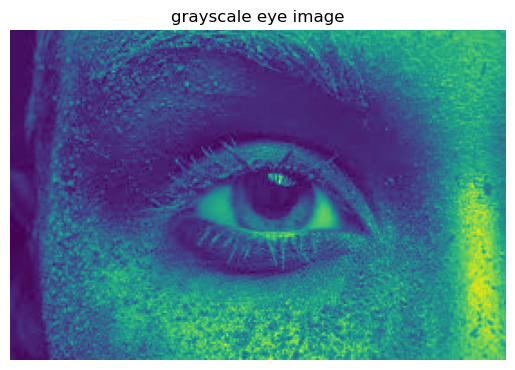

In [13]:
plt.imshow(gray)
plt.title('grayscale eye image')
plt.axis('off')
plt.show()

### Slicing

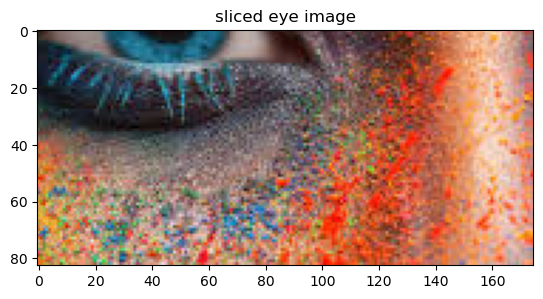

In [17]:
plt.imshow(image[100:400, 100:400, :])
plt.title('sliced eye image')
plt.show()

### RGB channels

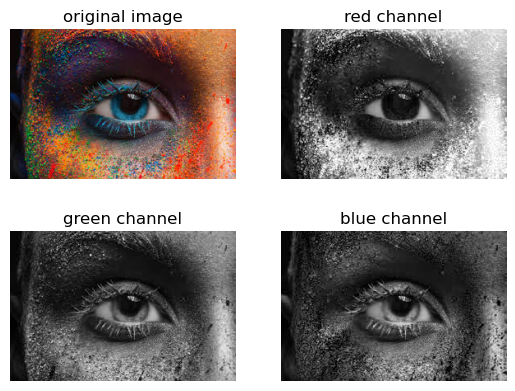

In [19]:
red = image[:, :, 0] 
green = image[:, :, 1]
blue = image[:, :, 2]

output = [image, red, green, blue]
titles = ['original image', 'red channel', 'green channel', 'blue channel']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(titles[i])
    if i == 0:
        plt.imshow(output[i])
    else:
        plt.imshow(output[i], cmap='gray')
plt.show()

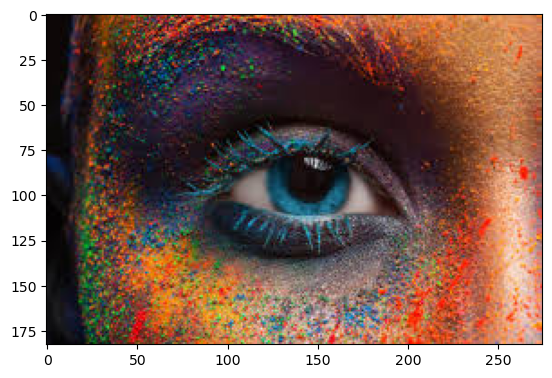

In [21]:
Output = np.dstack((red, green, blue))
plt.imshow(Output)
plt.show()

### Motion Difference

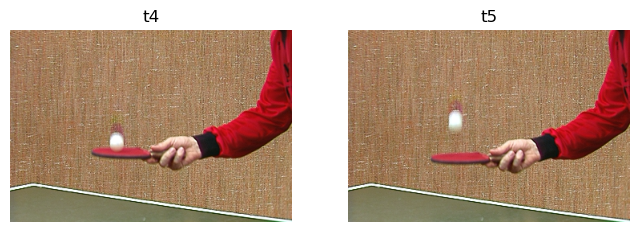

In [24]:
t4 = plt.imread("images/t4.png")
t5 = plt.imread("images/t5.png")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(t4)
plt.title("t4")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(t5)
plt.title("t5")
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


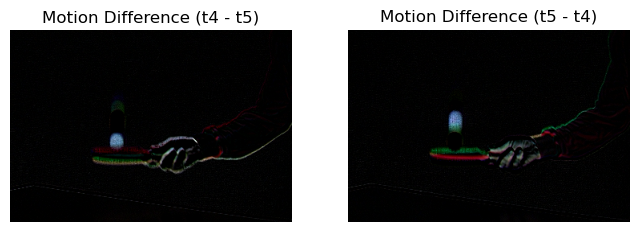

In [25]:
difference45 = t4-t5
difference54 = t5-t4

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(difference45)
plt.title("Motion Difference (t4 - t5)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(difference54)
plt.title("Motion Difference (t5 - t4)")
plt.axis('off')
plt.show()

### Point processing techniques

1. Darker image

/tmp/ipykernel_12488/876322268.py:3: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 34595 negative Z values that have been clipped to zero
  darker = lab2rgb(darker)


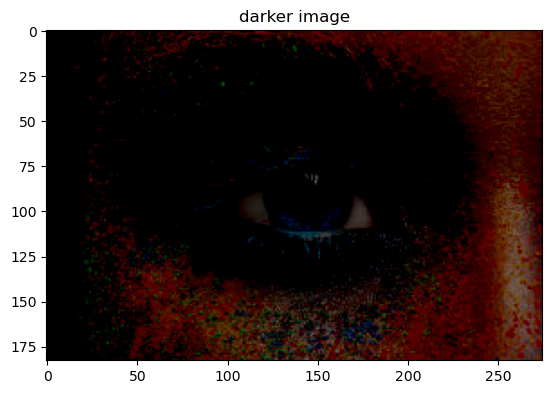

In [ ]:
darker = rgb2lab(image)
darker[..., 0] = darker[..., 0] - 50
darker = lab2rgb(darker)

plt.imshow(darker)
plt.title('darker image')
plt.show()

2. Reduce the difference between light and dark areas

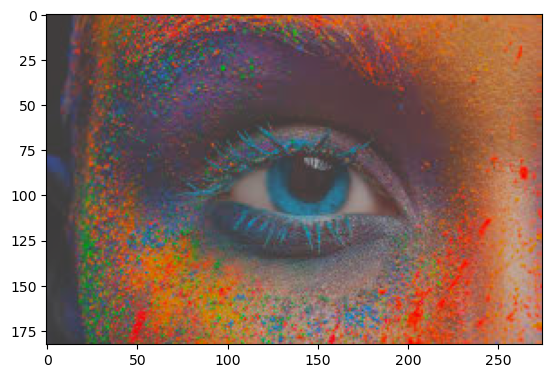

In [43]:
image_lab = rgb2lab(image)
L = image_lab[..., 0]
L = 50 + 0.5 * (L - 50) 
image_lab[..., 0] = np.clip(L, 0, 100)
image_flat = lab2rgb(image_lab)

plt.imshow(image_flat)
plt.show()

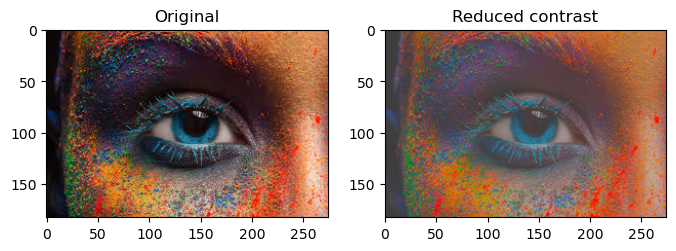

In [37]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(image_flat)
plt.title("Reduced contrast")
plt.show()

3. Change pixels from dark to light

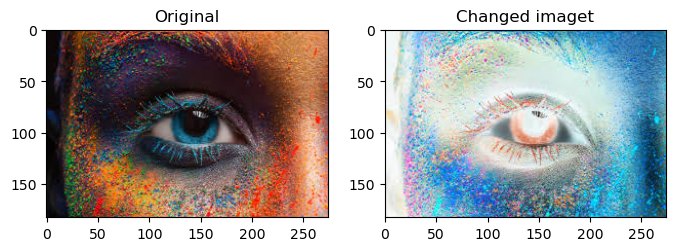

In [ ]:
changed_image = 255 - image

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(changed_image)
plt.title("Changed image")
plt.show()

4. Increase the brightness

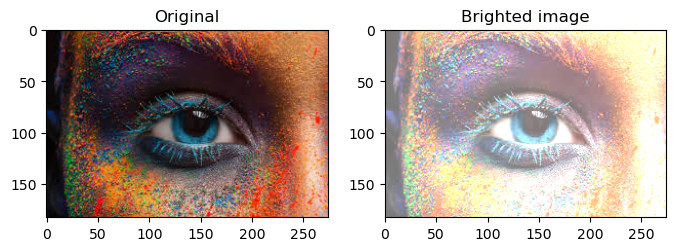

In [41]:
brighted_image = rgb2lab(image)
brighted_image[...,0] = brighted_image[...,0] + 50
brighted_image = lab2rgb(brighted_image)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(brighted_image)
plt.title("Brighted image")
plt.show()

5.Increasing the difference between light and dark areas.

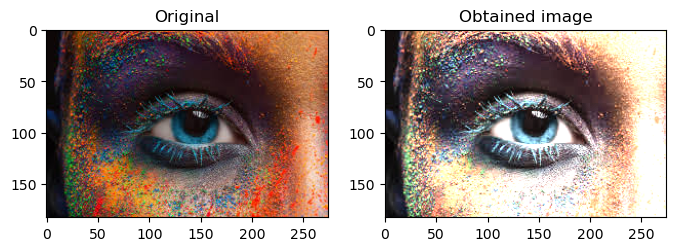

In [42]:
increased_image = rgb2lab(image)
increased_image[...,0] = increased_image[...,0]*2
increased_image = lab2rgb(increased_image)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(increased_image)
plt.title("Obtained image")
plt.show()